In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error 

In [2]:
dataset=pd.read_csv('feedX_main.csv')
dataset

,Data 1,Data 2,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9,Data 10,...,Data 3991,Data 3992,Data 3993,Data 3994,Data 3995,Data 3996,Data 3997,Data 3998,Data 3999,Data 4000
0,0.006009,0.004102,0.002789,0.004251,0.001816,0.004435,0.004305,0.005483,0.004491,0.003579,...,0.002285,0.004860,0.002880,0.003916,0.003020,0.003898,0.004898,0.002676,0.004053,0.004923
1,0.006033,0.004000,0.002621,0.004067,0.002103,0.004811,0.004239,0.005306,0.004299,0.003581,...,0.002276,0.004772,0.002532,0.003962,0.003053,0.003945,0.005170,0.002557,0.004208,0.004864
2,0.006057,0.003898,0.002455,0.003882,0.002406,0.005177,0.004173,0.005127,0.004106,0.003583,...,0.002268,0.004684,0.002198,0.004008,0.003087,0.003991,0.005436,0.002440,0.004362,0.004805
3,0.005950,0.003703,0.002397,0.003846,0.002749,0.005435,0.004073,0.004827,0.003884,0.003664,...,0.002204,0.004586,0.002096,0.004002,0.003233,0.003987,0.005597,0.002355,0.004471,0.004816
4,0.005652,0.003380,0.002482,0.004014,0.003141,0.005554,0.003927,0.004354,0.003624,0.003855,...,0.002065,0.004476,0.002303,0.003924,0.003536,0.003914,0.005621,0.002312,0.004518,0.004924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.004333,0.003082,0.002981,0.003749,0.003530,0.003928,0.003058,0.005221,0.005042,0.001349,...,0.002333,0.005770,0.004013,0.002790,0.003422,0.005143,0.005124,0.003478,0.004700,0.003813
2496,0.004540,0.003600,0.003054,0.003602,0.003303,0.003612,0.003270,0.005500,0.004969,0.001392,...,0.002258,0.005637,0.003706,0.002847,0.003200,0.005048,0.004806,0.003284,0.004510,0.003869
2497,0.004827,0.004046,0.003035,0.003563,0.003081,0.003391,0.003429,0.005719,0.004810,0.001524,...,0.002206,0.005433,0.003370,0.002982,0.003155,0.004860,0.004839,0.003155,0.004332,0.003936
2498,0.005169,0.004434,0.002950,0.003603,0.002865,0.003239,0.003550,0.005895,0.004587,0.001730,...,0.002170,0.005173,0.003015,0.003177,0.003237,0.004603,0.005126,0.003072,0.004161,0.004011


In [3]:
df=dataset.copy()

In [4]:
df.describe()

,Data 1,Data 2,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9,Data 10,...,Data 3991,Data 3992,Data 3993,Data 3994,Data 3995,Data 3996,Data 3997,Data 3998,Data 3999,Data 4000
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.003695,0.003734,0.003751,0.003749,0.003736,0.003725,0.003753,0.003722,0.003764,0.003749,...,0.003799,0.003726,0.003790,0.003732,0.003748,0.003712,0.003697,0.003772,0.003712,0.003715
std,0.001121,0.001118,0.001131,0.001155,0.001090,0.001138,0.001094,0.001066,0.001102,0.001065,...,0.001093,0.001118,0.001100,0.001096,0.001088,0.001129,0.001125,0.001130,0.001142,0.001106
min,0.001414,0.000844,0.001248,0.001823,0.001528,0.001383,0.001106,0.001189,0.001089,0.000812,...,0.001103,0.000991,0.001269,0.001359,0.001389,0.001319,0.001182,0.001004,0.001120,0.001042
25%,0.002818,0.002865,0.002865,0.002769,0.002840,0.002861,0.003023,0.002854,0.003002,0.003109,...,0.003004,0.002965,0.002869,0.002929,0.003008,0.002792,0.002768,0.002874,0.002808,0.002980
50%,0.003594,0.003759,0.003771,0.003545,0.003671,0.003514,0.003734,0.003672,0.003932,0.003881,...,0.003882,0.003698,0.004010,0.003654,0.003570,0.003777,0.003686,0.003779,0.003931,0.003541
75%,0.004455,0.004572,0.004437,0.004540,0.004516,0.004546,0.004553,0.004490,0.004584,0.004446,...,0.004608,0.004446,0.004575,0.004388,0.004360,0.004666,0.004488,0.004728,0.004645,0.004308
max,0.006428,0.006416,0.006717,0.006845,0.006806,0.006447,0.006565,0.006674,0.006188,0.006643,...,0.006306,0.007041,0.006880,0.006874,0.007066,0.006153,0.006385,0.006291,0.006048,0.006976


In [5]:
dataset1=pd.read_csv('feedY_main.csv')
dataset1

,Temp 1,Temp 2,Temp 3,Temp 4,Temp 5,Temp 6,Temp 7,Temp 8,Temp 9,Temp 10,...,Temp 3991,Temp 3992,Temp 3993,Temp 3994,Temp 3995,Temp 3996,Temp 3997,Temp 3998,Temp 3999,Temp 4000
0,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,...,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
1,193.42,181.23,188.04,178.65,189.71,198.15,162.68,182.16,178.79,197.56,...,170.68,181.17,182.29,195.45,185.24,178.56,189.60,184.70,199.84,194.43
2,186.01,167.74,176.35,166.31,180.06,193.15,149.93,170.15,164.26,192.80,...,157.39,169.85,169.20,187.48,174.02,166.51,181.48,172.13,198.70,189.02
3,180.42,159.27,168.31,158.89,173.47,188.04,142.96,162.80,155.46,188.41,...,149.67,162.87,160.84,180.97,166.64,159.33,176.07,163.93,196.77,184.78
4,175.99,153.27,162.37,153.68,168.54,183.45,138.29,157.65,149.32,184.52,...,144.35,157.89,154.83,175.77,161.19,154.33,172.01,157.99,194.52,181.17
5,172.33,148.70,157.72,149.70,164.62,179.41,134.84,153.75,144.68,181.05,...,140.36,154.04,150.19,171.50,156.91,150.54,168.73,153.37,192.21,178.00
6,169.22,145.05,153.94,146.51,161.38,175.84,132.13,150.63,140.99,177.94,...,137.19,150.93,146.44,167.91,153.40,147.53,165.96,149.62,189.94,175.16
7,166.51,142.04,150.78,143.86,158.62,172.67,129.91,148.04,137.95,175.12,...,134.58,148.32,143.31,164.83,150.43,145.05,163.57,146.49,187.77,172.60
8,164.11,139.49,148.08,141.59,156.22,169.84,128.05,145.84,135.37,172.56,...,132.37,146.08,140.63,162.14,147.88,142.96,161.45,143.80,185.70,170.26
9,161.95,137.29,145.73,139.62,154.10,167.28,126.45,143.93,133.14,170.22,...,130.47,144.12,138.31,159.76,145.63,141.15,159.55,141.46,183.74,168.13


In [6]:
dg=dataset1.copy()

In [7]:
dg.describe()

,Temp 1,Temp 2,Temp 3,Temp 4,Temp 5,Temp 6,Temp 7,Temp 8,Temp 9,Temp 10,...,Temp 3991,Temp 3992,Temp 3993,Temp 3994,Temp 3995,Temp 3996,Temp 3997,Temp 3998,Temp 3999,Temp 4000
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,165.126000,143.356500,151.09250,145.077500,158.297500,169.947000,132.587000,149.135500,139.517000,172.2460,...,136.620500,149.149000,144.155500,163.566000,150.631500,146.601000,162.869500,147.033500,183.913000,170.299000
std,15.304568,20.218494,19.22462,18.734501,16.653549,15.796752,19.800803,17.870207,21.115426,14.4232,...,20.150883,17.774813,20.402688,16.746621,18.627806,17.875199,14.652521,19.925266,10.558693,13.809634
min,147.600000,124.500000,131.76000,127.750000,140.760000,150.610000,117.150000,132.340000,120.140000,154.0400,...,119.340000,132.230000,124.460000,144.750000,131.840000,130.680000,146.900000,127.350000,168.750000,153.380000
25%,153.235000,129.190000,136.94250,132.190000,145.862500,157.052500,120.570000,136.705000,124.925000,160.4775,...,123.437500,136.697500,129.595000,150.482500,137.045000,134.505000,151.885000,132.617500,175.000000,159.242500
50%,160.970000,136.325000,144.69500,138.750000,153.155000,166.120000,125.750000,143.085000,132.165000,169.1400,...,129.635000,143.255000,137.285000,158.690000,144.635000,140.360000,158.690000,140.420000,182.810000,167.145000
75%,173.245000,149.842500,158.88250,150.695000,165.600000,180.420000,135.702500,154.725000,145.840000,181.9175,...,141.357500,155.002500,151.350000,172.567500,157.980000,151.487500,169.550000,154.525000,192.787500,178.792500
max,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000


In [8]:
(dg.iloc[:,25])

0     200.00
1     186.63
2     174.16
3     166.01
4     160.15
5     155.64
6     152.01
7     148.99
8     146.42
9     144.20
10    142.24
11    140.50
12    138.93
13    137.51
14    136.21
15    135.01
16    133.91
17    132.88
18    131.92
19    131.03
Name: Temp 26, dtype: float64

In [9]:
x=(df)
y=(dg)
x.shape,y.shape

((2500, 4000), (20, 4000))

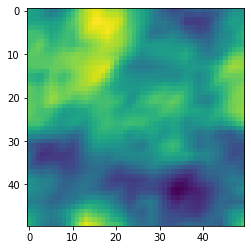

In [10]:
z=df.iloc[:,1]
z=np.array(z).reshape(50,50)
z.shape
a=plt.imshow(z)

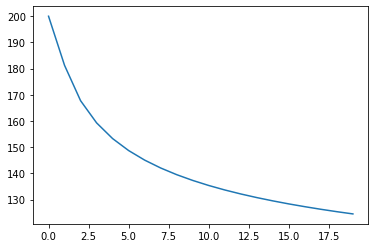

In [11]:
plt.plot(y.iloc[:,1])

In [12]:
x=x.T
y=y.T
x.shape,y.shape

((4000, 2500), (4000, 20))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20)

In [14]:
# Normalization
mean=x_train.mean(axis=0)
x_train-=mean
std=x_train.std(axis=0)
x_train/=std

x_test-=mean
x_test/=std

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3200, 2500)
(3200, 20)
(800, 2500)
(800, 20)


In [16]:
model = keras.Sequential([keras.layers.Dense(1024,input_dim = x_train.shape[1], activation = 'relu',name='Input_layer',
                          kernel_initializer='HeNormal'), 
                          keras.layers.BatchNormalization(),
                          
                          keras.layers.Dense(512,activation ='relu', name='Layer_2',kernel_initializer='HeNormal'),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dropout(rate=0.1),
                          
                          keras.layers.Dense(128,activation ='relu', name='Layer_3',kernel_initializer='HeNormal'),
                          keras.layers.BatchNormalization(),
                          
                          keras.layers.Dense(64,activation ='relu', name='Layer_4',kernel_initializer='HeNormal'),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dense(y_train.shape[1],activation = None, name= 'Output_layer',
                          kernel_initializer='HeNormal')])

In [17]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

In [18]:
learningRate=0.001
from keras import losses
model.compile(loss = losses.mean_squared_error, optimizer = keras.optimizers.Adam(learningRate), metrics = ['mse'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 1024)              2561024   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               5

In [20]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=150,batch_size=128,verbose=1,callbacks=[tb_callback])

Epoch 1/150
20/20 [==============================] - 21s 821ms/step - loss: 23182.6602 - mse: 23182.6602 - val_loss: 23145.8262 - val_mse: 23145.8262
Epoch 2/150
20/20 [==============================] - 4s 183ms/step - loss: 23119.5684 - mse: 23119.5684 - val_loss: 23446.5156 - val_mse: 23446.5156
Epoch 3/150
20/20 [==============================] - 3s 159ms/step - loss: 23040.2539 - mse: 23040.2539 - val_loss: 23666.8652 - val_mse: 23666.8652
Epoch 4/150
20/20 [==============================] - 3s 156ms/step - loss: 22936.7539 - mse: 22936.7539 - val_loss: 23858.5977 - val_mse: 23858.5977
Epoch 5/150
20/20 [==============================] - 3s 161ms/step - loss: 22805.8848 - mse: 22805.8848 - val_loss: 24200.2109 - val_mse: 24200.2109
Epoch 6/150
20/20 [==============================] - 3s 158ms/step - loss: 22649.9316 - mse: 22649.9316 - val_loss: 24136.8789 - val_mse: 24136.8789
Epoch 7/150
20/20 [==============================] - 3s 150ms/step - loss: 22463.7383 - mse: 22463.7383 -

20/20 [==============================] - 3s 134ms/step - loss: 4.4274 - mse: 4.4274 - val_loss: 5.6943 - val_mse: 5.6943
Epoch 116/150
20/20 [==============================] - 3s 145ms/step - loss: 4.0751 - mse: 4.0751 - val_loss: 6.4979 - val_mse: 6.4979
Epoch 117/150
20/20 [==============================] - 3s 136ms/step - loss: 4.4746 - mse: 4.4746 - val_loss: 5.1173 - val_mse: 5.1173
Epoch 118/150
20/20 [==============================] - 3s 143ms/step - loss: 3.7989 - mse: 3.7989 - val_loss: 4.9987 - val_mse: 4.9987
Epoch 119/150
20/20 [==============================] - 3s 138ms/step - loss: 3.4608 - mse: 3.4608 - val_loss: 4.7110 - val_mse: 4.7110
Epoch 120/150
20/20 [==============================] - 3s 137ms/step - loss: 2.8672 - mse: 2.8672 - val_loss: 4.8650 - val_mse: 4.8650
Epoch 121/150
20/20 [==============================] - 3s 140ms/step - loss: 3.5795 - mse: 3.5795 - val_loss: 4.8860 - val_mse: 4.8860
Epoch 122/150
20/20 [==============================] - 3s 138ms/step 

In [21]:
loss=model.evaluate(x_train,y_train)
print('loss= ',loss)

100/100 [==============================] - 3s 21ms/step - loss: 1.3528 - mse: 1.3528
loss=  [1.3527783155441284, 1.3527783155441284]


In [22]:
scores=model.evaluate(x_test,y_test)
print('scores= ',scores)

25/25 [==============================] - 1s 24ms/step - loss: 3.5945 - mse: 3.5945
scores=  [3.5945162773132324, 3.5945162773132324]


In [23]:
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2
  
def evaluate_model( X, y):
    loss = model.evaluate(X, y)
    predictions = model.predict(X)
    r2 = R_squared(y, predictions)
    return predictions, loss, r2

predictions1, loss1, r21 = evaluate_model(x_train,y_train)
predictions2, loss2, r22 = evaluate_model(x_test,y_test)

25/25 [==============================] - 1s 22ms/step - loss: 3.5945 - mse: 3.5945


In [24]:
print(loss1, r21)
print(loss2, r22)

[1.3527783155441284, 1.3527783155441284] tf.Tensor(0.9969128145026259, shape=(), dtype=float64)
[3.5945162773132324, 3.5945162773132324] tf.Tensor(0.9919302061255992, shape=(), dtype=float64)


In [25]:
prediction=model.predict(x_test)

In [26]:
predt=model.predict(x_train)

In [27]:
print(prediction[200])

[198.54199 182.94826 170.52176 162.34824 156.77513 152.5004  148.85365
 146.0427  143.70782 141.19165 139.36905 137.34111 135.72173 134.72588
 132.79839 132.135   130.89554 129.9556  128.88962 127.82789]


In [28]:
y_test.iloc[200]

0     200.00
1     184.20
2     171.82
3     163.76
4     157.93
5     153.42
6     149.76
7     146.71
8     144.10
9     141.83
10    139.82
11    138.03
12    136.41
13    134.94
14    133.59
15    132.35
16    131.20
17    130.13
18    129.13
19    128.20
Name: Temp 259, dtype: float64

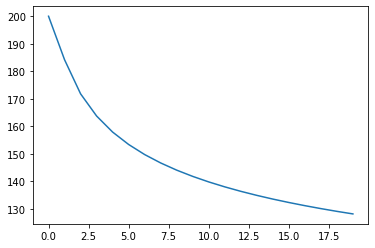

In [29]:
plt.plot(y_test.iloc[200])

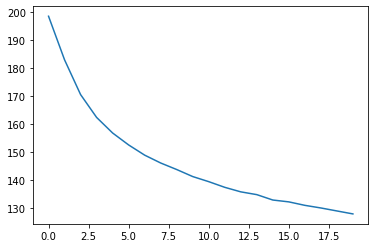

In [30]:
plt.plot(prediction[200])

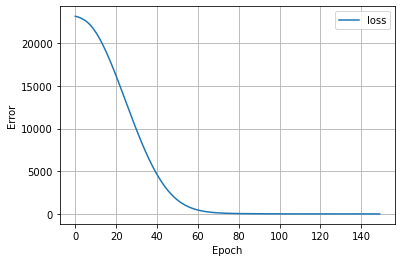

In [31]:
plt.plot(history.history['loss'],label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

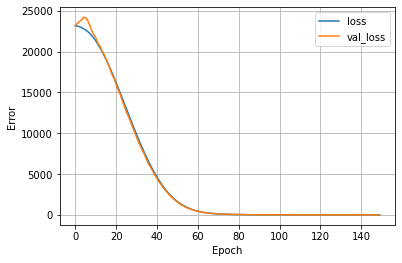

In [32]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(prediction,y_test)

3.5945161177437064

In [35]:
mean_squared_error(predt,y_train)

1.3527782419007015

In [36]:
r2_score(prediction,y_test)

0.902738217270973

In [37]:
r2_score(predt,y_train)

0.9254221263248036

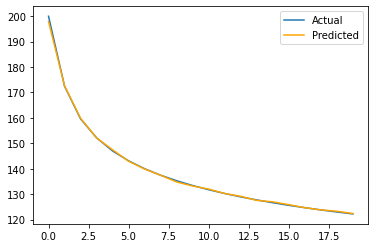

In [38]:
plt.plot(y_test.iloc[100],label='Actual')
plt.plot(prediction[100],color='orange',label='Predicted')
plt.legend()
plt.show()

In [39]:
import random
b=np.random.randint(1,3200,size=9)
b.tolist()

[2016, 3166, 1441, 2938, 2966, 547, 1578, 659, 39]

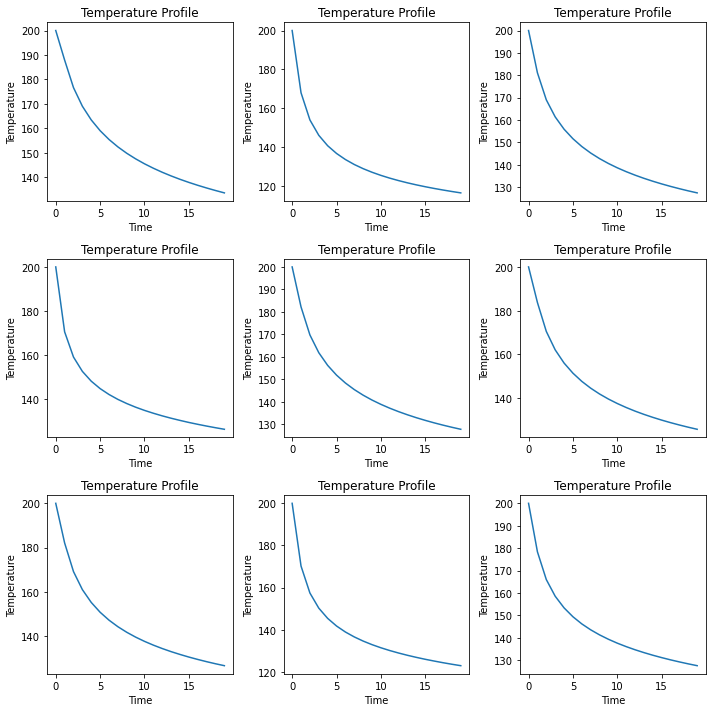

In [40]:
plt.subplots(figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in enumerate(b):
    plt.subplot(3, 3,i[0]+1)
    plt.plot(y_train.iloc[i[1]])
    plt.xlim=([0,20])
    
    plt.title('Temperature Profile')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.tight_layout()
    
    

In [41]:
import random
b=np.random.randint(y_test.shape[0],size=9)
b.tolist()

[178, 462, 406, 102, 761, 729, 452, 766, 593]

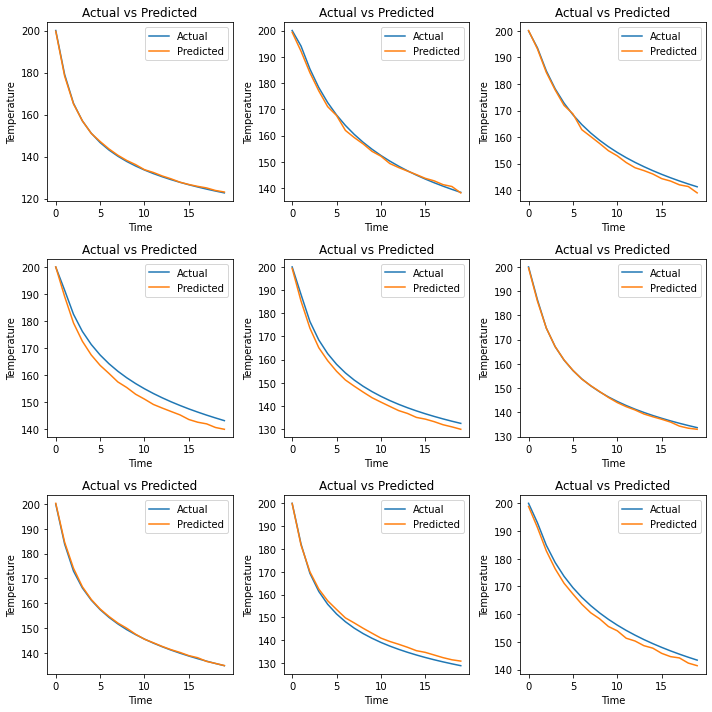

In [42]:
plt.subplots(figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in enumerate(b):
    plt.subplot(3, 3,i[0]+1)
    plt.plot(y_test.iloc[i[1]],label='Actual')
    plt.plot(prediction[i[1]],label='Predicted')
    plt.xlim=([0,20])
    #plt.xticks(range(0,21,1))
    plt.title('Actual vs Predicted')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()
    plt.tight_layout()
    
    


In [43]:
X_1D = np.array(x)

X_2D = X_1D.reshape(X_1D.shape[0],50,50)

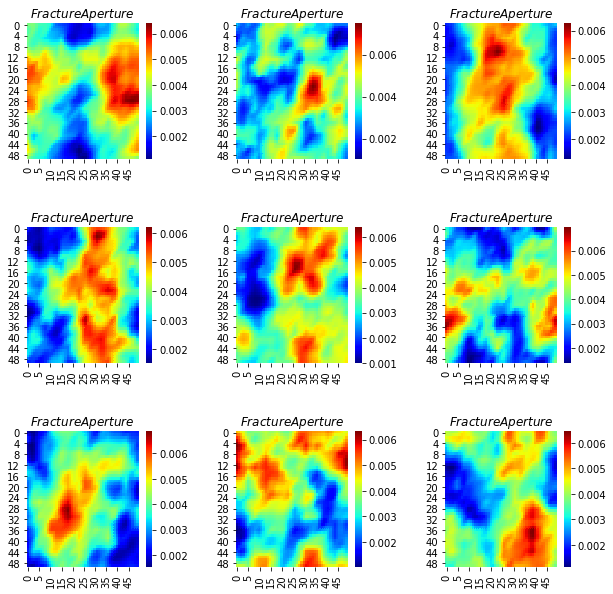

In [44]:
import seaborn as sns
Container= np.random.randint(1,4000,9)
list(enumerate(Container))
plt.subplots(figsize =(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

for i in enumerate(Container):
    plt.subplot(3,3,i[0]+1)
    plt.title("$ Fracture  Aperture$")
    sns.heatmap(X_2D[i[1]],cmap='jet')

[(0, 178), (1, 3), (2, 452), (3, 50), (4, 229), (5, 100)]


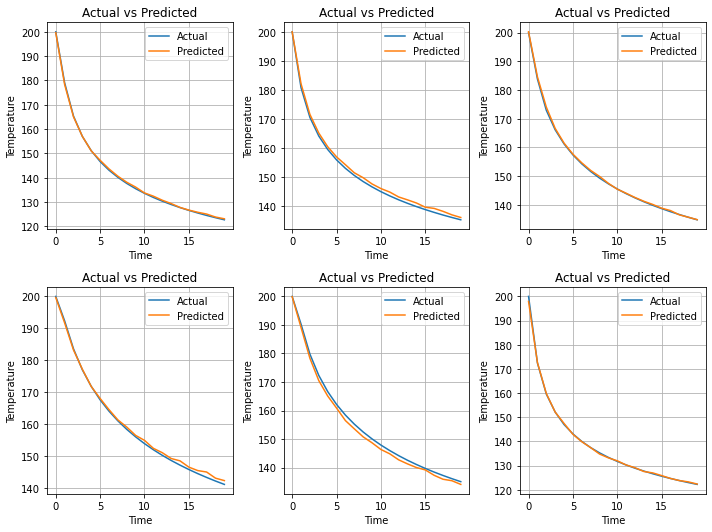

In [50]:
import random
#b=np.random.randint(y_test.shape[0],size=9)
b=(178,3,452,50,229,100)
#b.tolist()
print(list(enumerate(b)))

plt.subplots(figsize=(10,7.5))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in enumerate(b):
    plt.subplot(2, 3,i[0]+1)
    plt.plot(y_test.iloc[i[1]],label='Actual')
    plt.plot(prediction[i[1]],label='Predicted')
    plt.xlim=([0,20])
    #plt.xticks(range(0,21,1))
    plt.title('Actual vs Predicted')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
